<a href="https://colab.research.google.com/github/ZaidB3108/IPL-analytics/blob/master/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaid Asif Basri
BE CE C
118A1010

In [ ]:
import numpy as np # numerical computing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import seaborn as sns #modern visualization
from sklearn.model_selection import train_test_split#for training and testing our model
from sklearn.linear_model import LogisticRegression#ML algorithm
from sklearn import metrics

In [ ]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [ ]:
matches= pd.read_csv("C:\\Users\\Zaid\\Desktop\\Projects\\Sports analytics\\ipl\\matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.shape

(636, 18)

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [ ]:
matches['city']=matches['city'].astype('category')
matches['city1']=matches['city'].cat.codes

matches['date']=matches['date'].astype('category')
matches['date1']=matches['date'].cat.codes

matches['team1']=matches['team1'].astype('category')
matches['team1_1']=matches['team1'].cat.codes

matches['team2']=matches['team2'].astype('category')
matches['team2_1']=matches['team2'].cat.codes

matches['toss_winner']=matches['toss_winner'].astype('category')
matches['toss_winner1']=matches['toss_winner'].cat.codes

matches['toss_decision']=matches['toss_decision'].astype('category')
matches['toss_decision1']=matches['toss_decision'].cat.codes

matches['result']=matches['result'].astype('category')
matches['result1']=matches['result'].cat.codes

matches['winner']=matches['winner'].astype('category')
matches['winner1']=matches['winner'].cat.codes

matches['player_of_match']=matches['player_of_match'].astype('category')
matches['player_of_match1']=matches['player_of_match'].cat.codes

matches['venue']=matches['venue'].astype('category')
matches['venue1']=matches['venue'].cat.codes

matches['umpire1']=matches['umpire1'].astype('category')
matches['umpire1_1']=matches['umpire1'].cat.codes

matches['umpire2']=matches['umpire2'].astype('category')
matches['umpire1_1']=matches['umpire2'].cat.codes

In [ ]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3,city1,date1,team1_1,team2_1,toss_winner1,toss_decision1,result1,winner1,player_of_match1,venue1,umpire1_1
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN,13.149371,220.841195,5.938679,6.111635,5.921384,0.570755,1.006289,6.045597,97.014151,17.388365,22.836478
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN,8.027003,128.474753,4.165590,3.967401,4.018083,0.495358,0.125333,4.121707,62.952411,9.550782,12.719567
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN,6.750000,110.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,38.000000,8.000000,11.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN,13.000000,218.500000,6.000000,6.000000,6.000000,1.000000,1.000000,6.000000,93.500000,15.000000,25.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN,21.000000,329.000000,9.000000,9.000000,9.000000,1.000000,1.000000,9.000000,156.250000,24.000000,33.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN,29.000000,449.000000,13.000000,13.000000,13.000000,1.000000,2.000000,13.000000,200.000000,34.000000,44.000000


In [ ]:
matches.drop('umpire3', axis = 1, inplace = True)  #cleaning data

In [ ]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,date1,team1_1,team2_1,toss_winner1,toss_decision1,result1,winner1,player_of_match1,venue1,umpire1_1
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,407,13,12,12,1,1,13,199,23,23
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,408,7,10,10,1,1,10,176,16,33


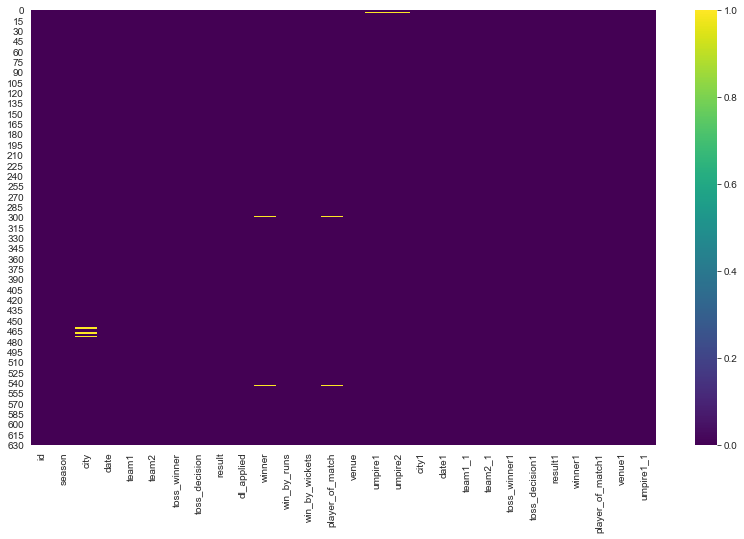

In [ ]:
sns.heatmap(matches.isnull(), cmap ="viridis" )

In [ ]:
matches['id'].max()

636

In [ ]:
matches['season'].unique()


array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [ ]:
len(matches['season'].unique())

10

In [ ]:
#Team won by maximum runs
matches.iloc[matches['win_by_runs'].idxmax()]

id                                44
season                          2017
city                           Delhi
date                      2017-05-06
team1                 Mumbai Indians
team2               Delhi Daredevils
toss_winner         Delhi Daredevils
toss_decision                  field
result                        normal
dl_applied                         0
winner                Mumbai Indians
win_by_runs                      146
win_by_wickets                     0
player_of_match          LMP Simmons
venue               Feroz Shah Kotla
umpire1                  Nitin Menon
umpire2                    CK Nandan
city1                              9
date1                            437
team1_1                            7
team2_1                            2
toss_winner1                       2
toss_decision1                     1
result1                            1
winner1                            7
player_of_match1                  92
venue1                             8
u

In [ ]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [ ]:
#team won by maximum wickets
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                       3
season                                                2017
city                                                Rajkot
date                                            2017-04-07
team1                                        Gujarat Lions
team2                                Kolkata Knight Riders
toss_winner                          Kolkata Knight Riders
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                               Kolkata Knight Riders
win_by_runs                                              0
win_by_wickets                                          10
player_of_match                                    CA Lynn
venue               Saurashtra Cricket Association Stadium
umpire1                                        Nitin Menon
umpire2                                          CK Nand

In [ ]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [ ]:
#team won by mnimum runs
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [ ]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                    560
season                               2015
city                              Kolkata
date                           2015-05-09
team1                     Kings XI Punjab
team2               Kolkata Knight Riders
toss_winner               Kings XI Punjab
toss_decision                         bat
result                             normal
dl_applied                              0
winner              Kolkata Knight Riders
win_by_runs                             0
win_by_wickets                          1
player_of_match                AD Russell
venue                        Eden Gardens
umpire1                      AK Chaudhary
umpire2                   HDPK Dharmasena
city1                                  20
date1                                 346
team1_1                                 4
team2_1                                 6
toss_winner1                            4
toss_decision1                          0
result1                           

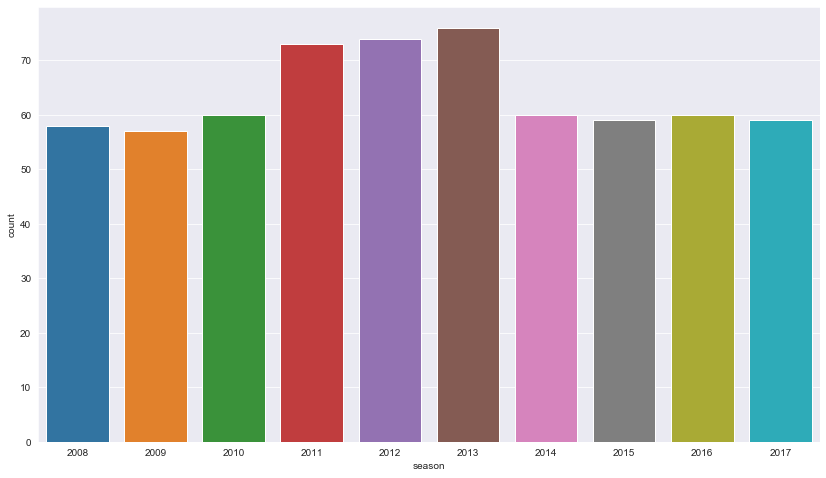

In [ ]:
sns.countplot(x='season', data=matches)
plt.show()

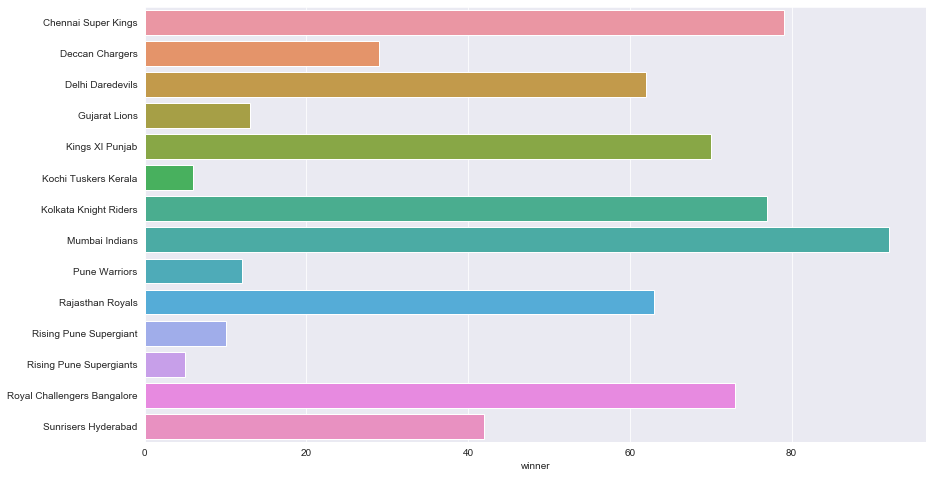

In [ ]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

Displaying Top Players in the game

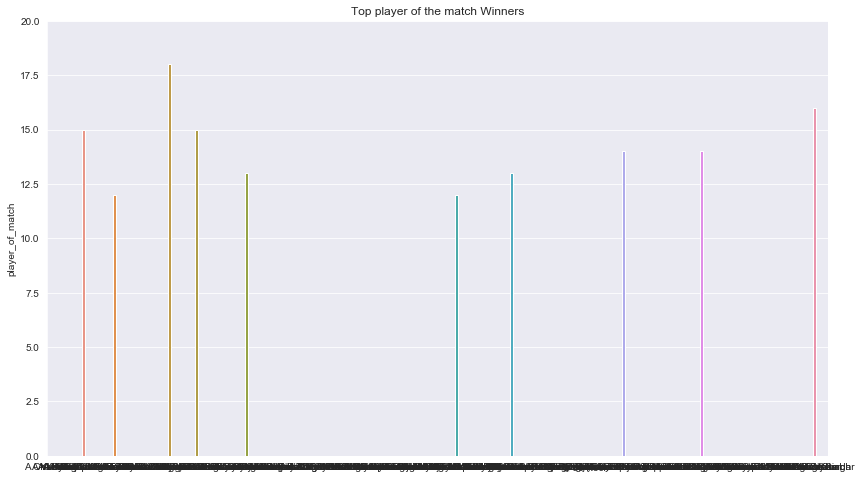

In [ ]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

Displaying avg of teams won by most runs

In [ ]:
matches[matches['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Rajasthan Royals               31.0
Rising Pune Supergiants        26.5
Mumbai Indians                 25.0
Chennai Super Kings            24.0
Pune Warriors                  23.0
Kolkata Knight Riders          23.0
Royal Challengers Bangalore    22.5
Kings XI Punjab                22.5
Rising Pune Supergiant         20.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            16.0
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

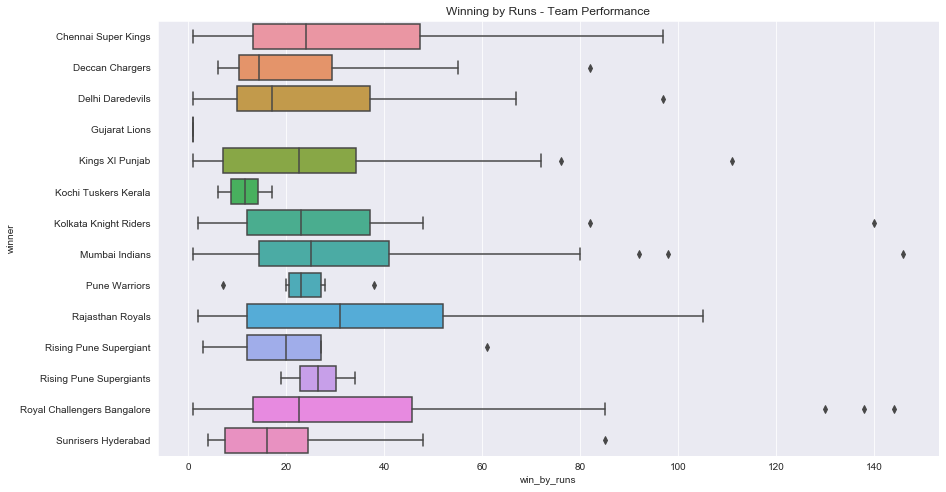

In [ ]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Runs - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_runs', data=matches[matches['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

In [ ]:
matches[matches['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Royal Challengers Bangalore    7.0
Rising Pune Supergiants        7.0
Kolkata Knight Riders          7.0
Pune Warriors                  6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Delhi Daredevils               6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Name: win_by_wickets, dtype: float64

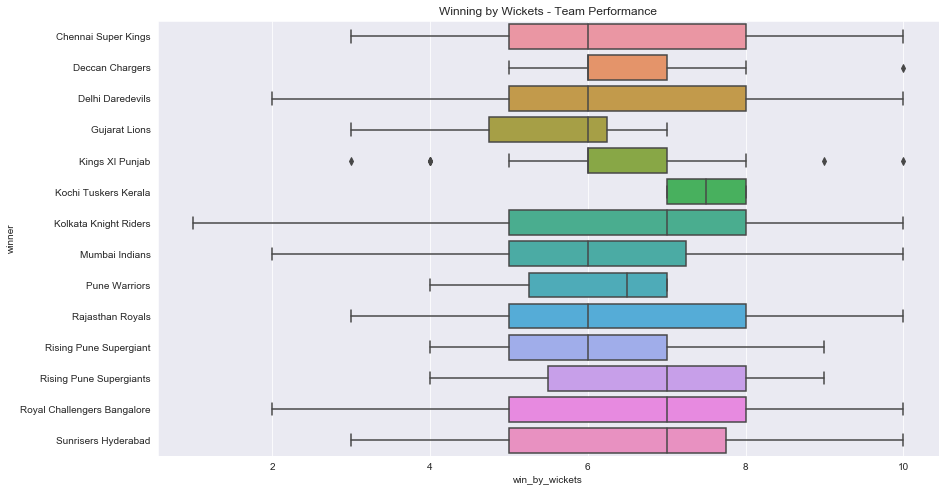

In [ ]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Wickets - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=matches[matches['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()

In [ ]:
#Does Toss Help in winning matches
ss = matches['toss_winner'] == matches['winner']

ss.groupby(ss).size()

winner
False    311
True     325
Name: winner, dtype: int64

In [ ]:
#converting to percentage
round(ss.groupby(ss).size()/ss.count()*100,2)

winner
False    48.9
True     51.1
Name: winner, dtype: float64

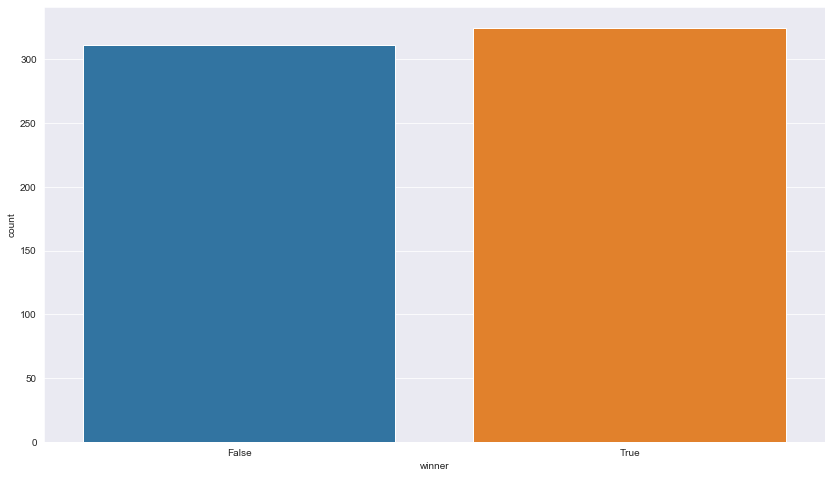

In [ ]:
sns.countplot(ss)

In [ ]:
matches["win_predictor"] = ss

C:\Users\Zaid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Zaid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


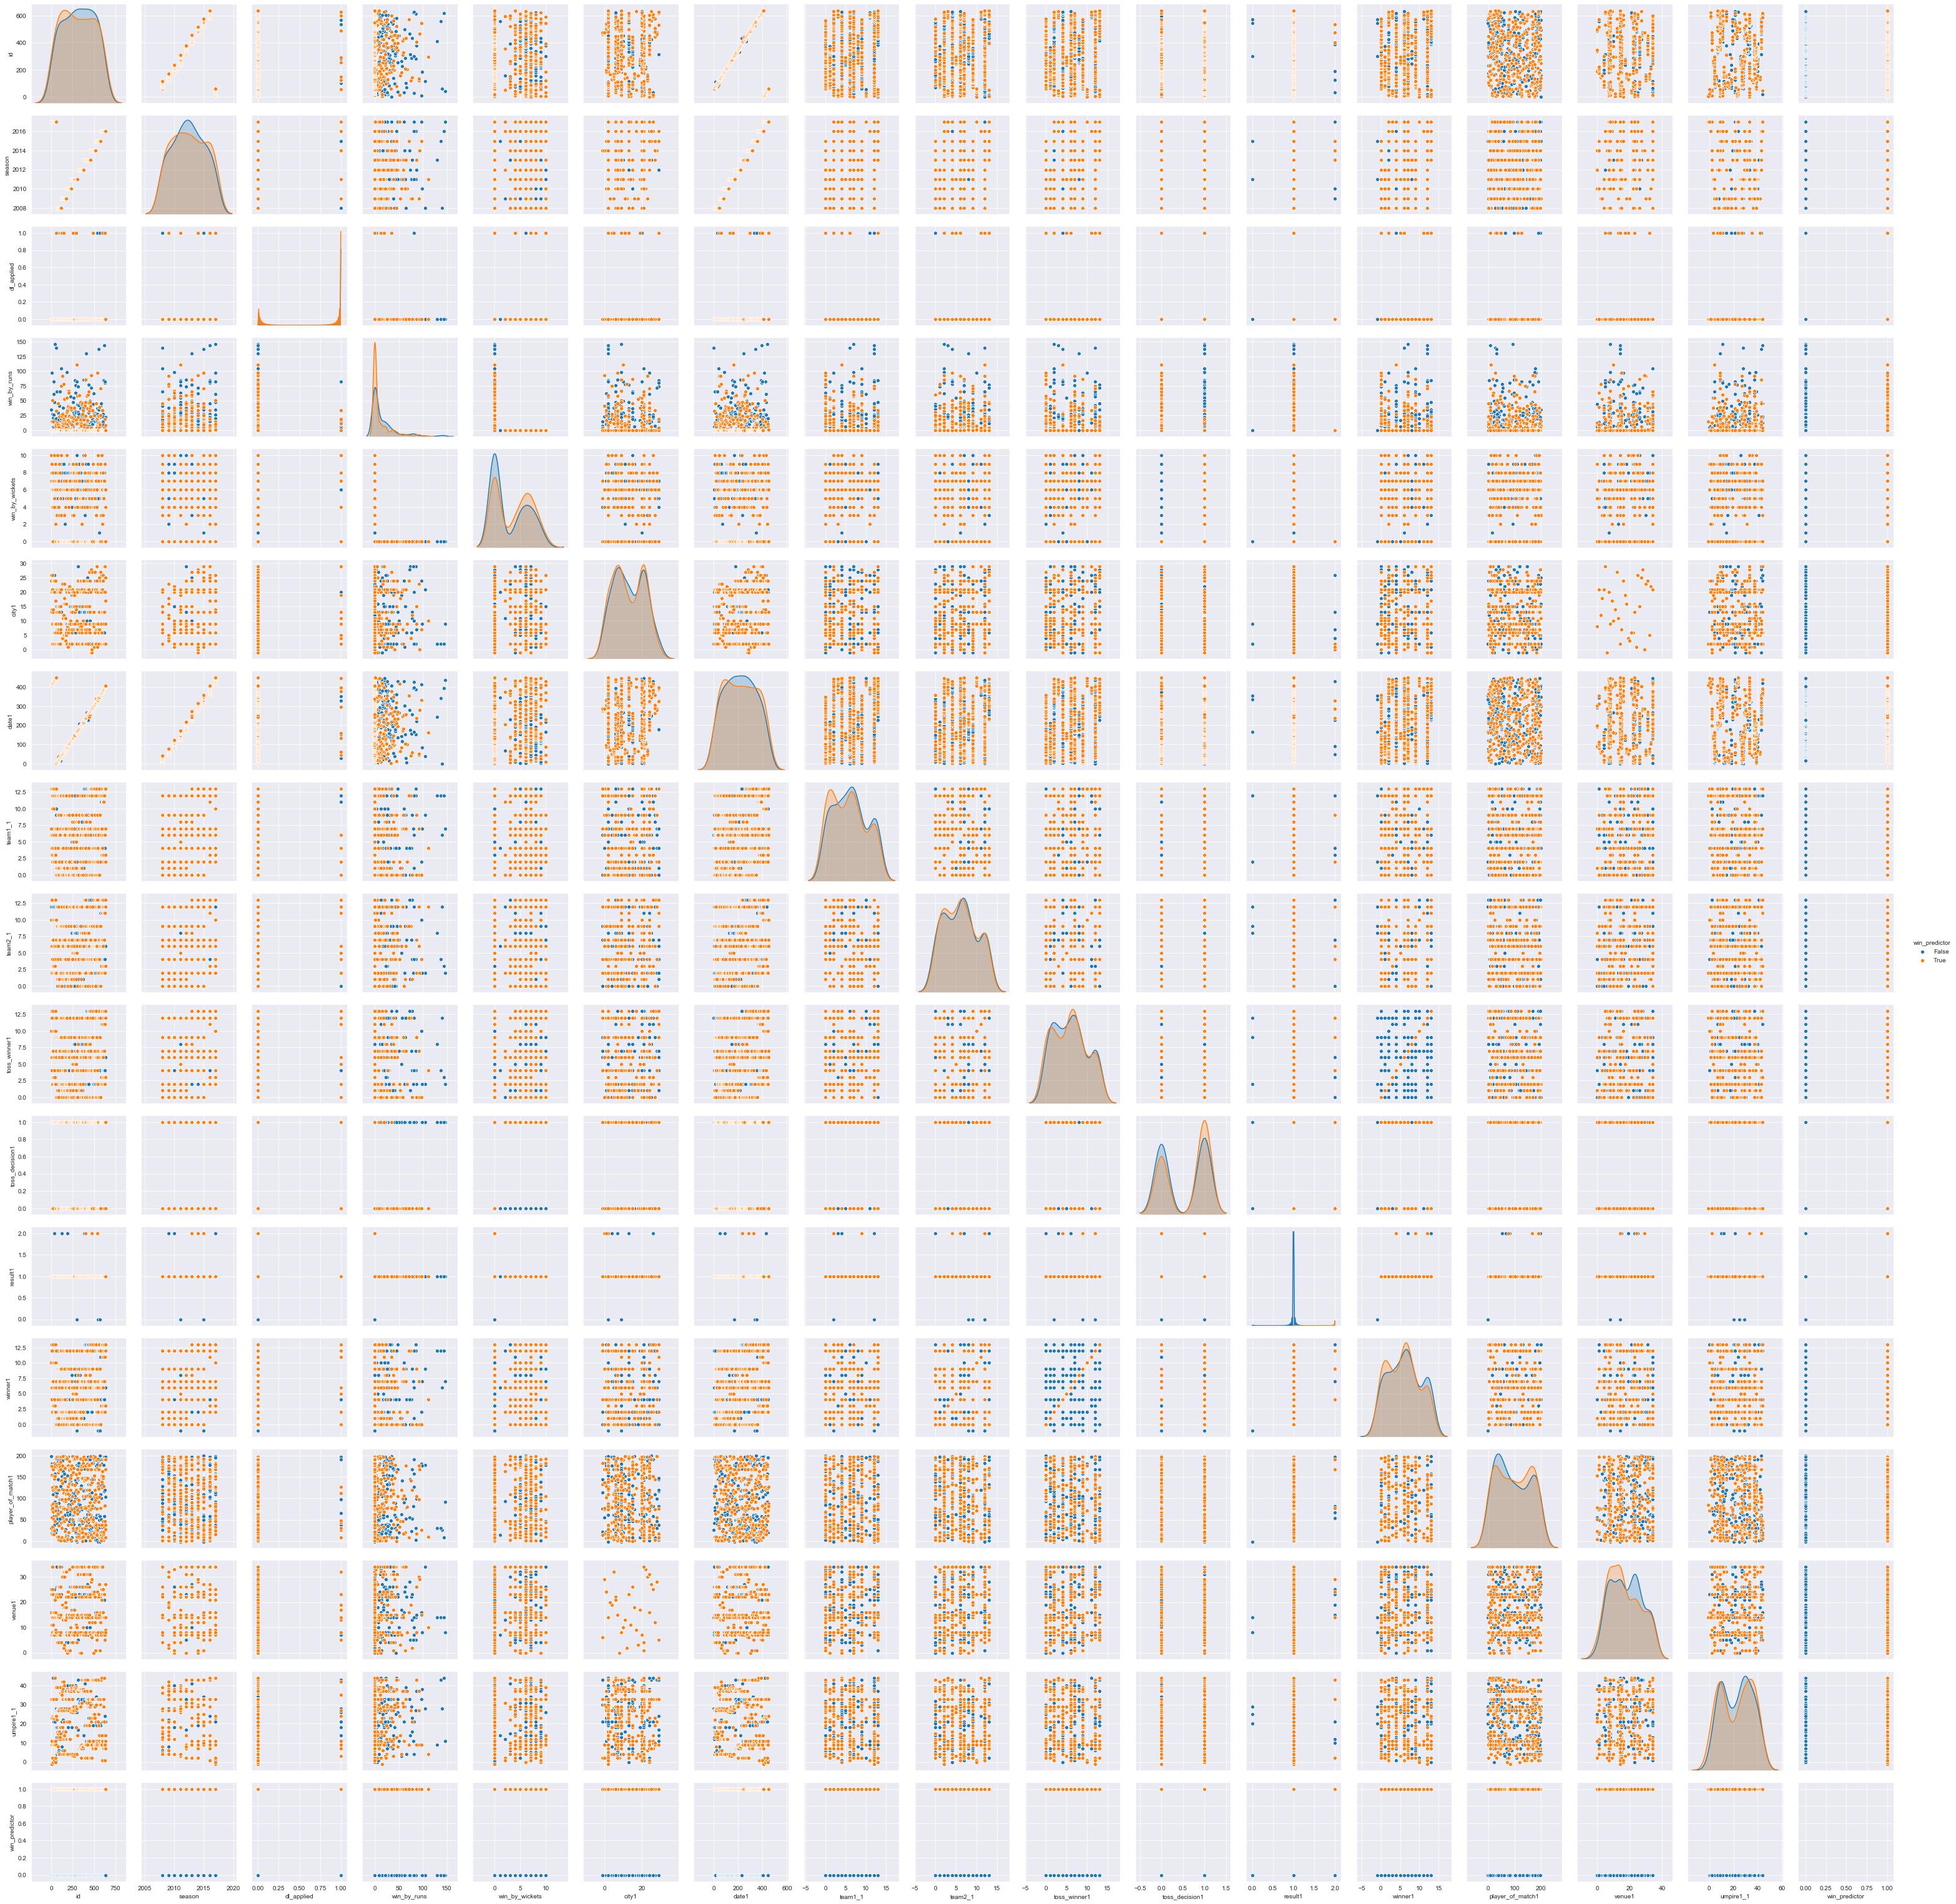

In [ ]:
sns.pairplot(matches,hue='win_predictor')

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,team1_1,team2_1,toss_winner1,toss_decision1,result1,winner1,player_of_match1,venue1,umpire1_1,win_predictor
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,13,12,12,1,1,13,199,23,23,False
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,10,10,1,1,10,176,16,33,True
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,3,6,6,1,1,6,30,25,11,True
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,10,4,4,1,1,4,56,11,9,True
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,12,2,12,0,1,12,84,14,-1,True


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 29 columns):
id                  636 non-null int64
season              636 non-null int64
city                629 non-null category
date                636 non-null category
team1               636 non-null category
team2               636 non-null category
toss_winner         636 non-null category
toss_decision       636 non-null category
result              636 non-null category
dl_applied          636 non-null int64
winner              633 non-null category
win_by_runs         636 non-null int64
win_by_wickets      636 non-null int64
player_of_match     633 non-null category
venue               636 non-null category
umpire1             635 non-null category
umpire2             635 non-null category
city1               636 non-null int8
date1               636 non-null int16
team1_1             636 non-null int8
team2_1             636 non-null int8
toss_winner1        636 non-null int8
toss_

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,team1_1,team2_1,toss_winner1,toss_decision1,result1,winner1,player_of_match1,venue1,umpire1_1,win_predictor
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,13,12,12,1,1,13,199,23,23,False
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,10,10,1,1,10,176,16,33,True
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,3,6,6,1,1,6,30,25,11,True
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,10,4,4,1,1,4,56,11,9,True
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,12,2,12,0,1,12,84,14,-1,True


In [ ]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,city1,date1,team1_1,team2_1,toss_winner1,toss_decision1,result1,winner1,player_of_match1,venue1,umpire1_1
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,13.149371,220.841195,5.938679,6.111635,5.921384,0.570755,1.006289,6.045597,97.014151,17.388365,22.836478
std,183.741666,2.773026,0.156726,23.908877,3.420338,8.027003,128.474753,4.165590,3.967401,4.018083,0.495358,0.125333,4.121707,62.952411,9.550782,12.719567
min,1.000000,2008.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,6.750000,110.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,38.000000,8.000000,11.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,13.000000,218.500000,6.000000,6.000000,6.000000,1.000000,1.000000,6.000000,93.500000,15.000000,25.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,21.000000,329.000000,9.000000,9.000000,9.000000,1.000000,1.000000,9.000000,156.250000,24.000000,33.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000,29.000000,449.000000,13.000000,13.000000,13.000000,1.000000,2.000000,13.000000,200.000000,34.000000,44.000000


Using Machine Learning Algorithm Logistic Regression

Training and Testing

In [ ]:
matches.drop('city', axis = 1, inplace = True)
matches.drop('date', axis = 1, inplace = True)
matches.drop('team1', axis = 1, inplace = True)
matches.drop('team2', axis = 1, inplace = True)
matches.drop('toss_winner', axis = 1, inplace = True)
matches.drop('toss_decision', axis = 1, inplace = True)
matches.drop('result', axis = 1, inplace = True)
matches.drop('winner', axis = 1, inplace = True)
matches.drop('player_of_match', axis = 1, inplace = True)
matches.drop('venue', axis = 1, inplace = True)
matches.drop('umpire1', axis = 1, inplace = True)
matches.drop('umpire2', axis = 1, inplace = True)

In [ ]:
X = matches.drop("win_predictor",axis=1)
y = matches["win_predictor"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

C:\Users\Zaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n       False       0.66      0.46      0.54        67\n        True       0.56      0.74      0.63        61\n\n    accuracy                           0.59       128\n   macro avg       0.61      0.60      0.59       128\nweighted avg       0.61      0.59      0.59       128\n'

In [ ]:
confusion_matrix(y_test,prediction)

array([[31, 36],
       [16, 45]], dtype=int64)

In [ ]:
accuracy_score(y_test,prediction)*100

59.375

Using Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_test1 = dt.predict(X_test)
acc_1 = metrics.accuracy_score(y_test1,y_test)
acc_1*100

85.15625

K Means

In [ ]:
matches.isnull().sum()

id                  0
season              0
dl_applied          0
win_by_runs         0
win_by_wickets      0
city1               0
date1               0
team1_1             0
team2_1             0
toss_winner1        0
toss_decision1      0
result1             0
winner1             0
player_of_match1    0
venue1              0
umpire1_1           0
win_predictor       0
dtype: int64

In [ ]:
p = matches.loc[:,["toss_winner1","winner1"]].values


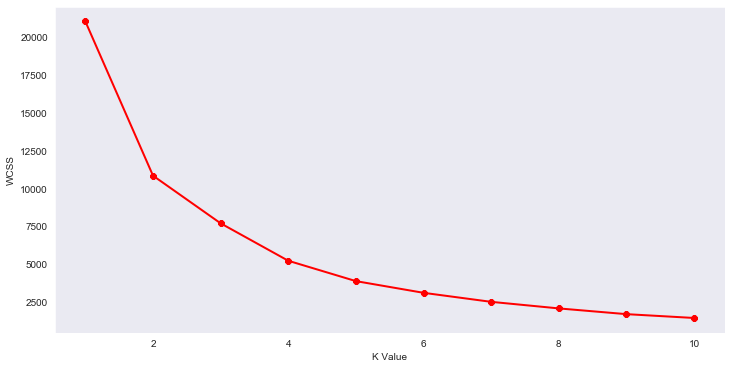

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++')
    kmeans.fit(p)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)

y_kmeans = kmeans.fit_predict(p)

print(label)

[1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 1 1 0 1 1 1 

In [ ]:
print(kmeans.cluster_centers_)

[[2.90277778 2.84375   ]
 [8.41954023 8.6954023 ]]


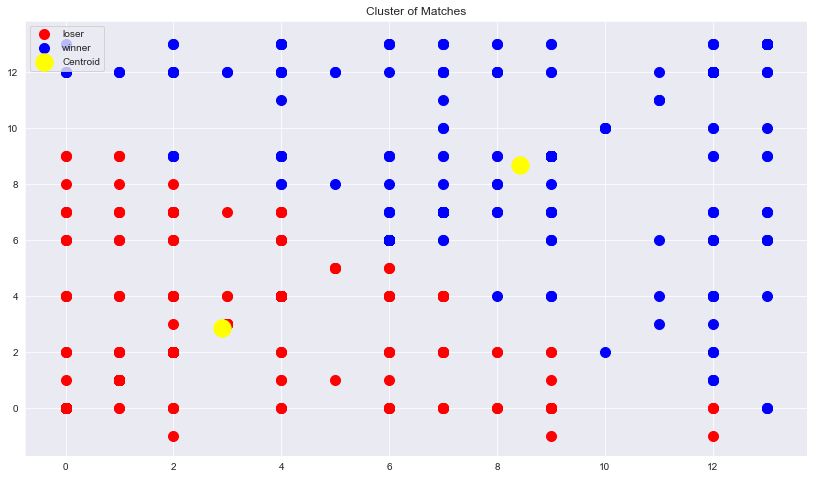

In [ ]:
plt.scatter(p[y_kmeans==0,0], p[y_kmeans==0,1],s = 100,c = 'red', label = 'loser')
plt.scatter(p[y_kmeans==1,0], p[y_kmeans==1,1],s = 100,c = 'blue', label = 'winner')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroid')
plt.title("Cluster of Matches")
plt.legend()
plt.show()

In [ ]:
KModel = kmeans.fit(p)
KModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Thank You